In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)


In [2]:
def asf_project(pr):
    name = pr.split("-")[0]
    if name == "incubator":
        return pr.split("-")[1]
    return name

In [3]:
project = "ozone"

In [4]:
# Parameters
project = "pinot"


In [5]:
actions = pd.read_csv("github-action-run.csv.gz")
                          
actions.createdat = pd.to_datetime(actions.createdat * 1000000, utc = True)
actions.updatedat = pd.to_datetime(actions.updatedat * 1000000, utc = True)
actions.firstjobstarted = pd.to_datetime(actions.firstjobstarted * 1000000, utc = True)
actions.lastjobcompleted = pd.to_datetime(actions.lastjobcompleted * 1000000, utc = True)                

In [6]:
actions["project"] = actions.repo.apply(asf_project)
actions["jobhours"] = actions.jobseconds / 60 / 60
actions["month"] = actions.createdat.dt.strftime("%Y-%m")

In [7]:
actions =  actions[actions.month.isin(["2021-03","2021-02"])]
last_month = "2021-03"
actions = actions[actions.project == project]

## Job executions per month

Maximum available value is 180 * 24 * days == 129600 (30 days) .. 133920 (31 days)

In [8]:
actions[["jobhours"]].groupby(actions.month).agg({"jobhours":["sum","mean", "max", "count"]})

jobhours                           
                 sum      mean        max count
month                                          
2021-02   602.723611  1.141522   5.042222   528
2021-03  1031.299167  1.507747  16.518889   684

## Number of jobs executed by git repositories (last month)

In [9]:
actions[actions.month == last_month][["repo","jobhours"]].groupby("repo").agg({"jobhours":["sum","mean", "max"]}).sort_values(('jobhours',"sum"), ascending=False).head(20)

jobhours                     
                         sum      mean        max
repo                                             
incubator-pinot  1031.299167  1.507747  16.518889

## Job hour statustics per workflows

In [10]:
actions[actions.month == last_month][["repo","workflowid","jobhours"]].groupby(["repo","workflowid"]).agg({"jobhours":["sum","mean", "max"]}).sort_values(('jobhours',"sum"), ascending=False)

jobhours                     
                                    sum      mean        max
repo            workflowid                                  
incubator-pinot 1474478     1030.867222  3.014232  16.518889
                4831220        0.431944  0.001263   0.006944

## Slowest workflow runs


In [11]:
actions.sort_values("jobhours", ascending=False).head(25)

,org,repo,id,runnumber,createdat,updatedat,status,conclusion,workflowid,firstjobstarted,lastjobcompleted,jobdetails,jobs,jobseconds,project,jobhours,month
703737,apache,incubator-pinot,704021928,2851,2021-03-31 06:35:27+00:00,2021-03-31 09:26:37+00:00,completed,cancelled,1474478,2021-03-31 06:35:39+00:00,2021-03-31 09:19:59+00:00,True,7,59468,pinot,16.518889,2021-03
703736,apache,incubator-pinot,703896991,2850,2021-03-31 05:36:56+00:00,2021-03-31 06:57:10+00:00,completed,cancelled,1474478,2021-03-31 05:37:33+00:00,2021-03-31 06:56:59+00:00,True,7,29921,pinot,8.311389,2021-03
703536,apache,incubator-pinot,653189292,2670,2021-03-15 06:18:25+00:00,2021-03-15 07:29:58+00:00,completed,failure,1474478,2021-03-15 06:18:49+00:00,2021-03-15 07:29:52+00:00,True,9,21388,pinot,5.941111,2021-03
703689,apache,incubator-pinot,699342073,2808,2021-03-29 21:43:32+00:00,2021-03-30 01:13:25+00:00,completed,failure,1474478,2021-03-29 22:01:10+00:00,2021-03-30 01:13:17+00:00,True,9,19789,pinot,5.496944,2021-03
703672,apache,incubator-pinot,696951297,2793,2021-03-29 06:57:15+00:00,2021-03-29 10:10:57+00:00,completed,failure,1474478,2021-03-29 06:57:26+00:00,2021-03-29 10:10:47+00:00,True,9,19257,pinot,5.349167,2021-03
703511,apache,incubator-pinot,644575532,2648,2021-03-12 00:23:20+00:00,2021-03-12 03:03:33+00:00,completed,failure,1474478,2021-03-12 00:23:32+00:00,2021-03-12 03:01:58+00:00,True,9,19166,pinot,5.323889,2021-03
703520,apache,incubator-pinot,645133380,2656,2021-03-12 05:05:17+00:00,2021-03-12 07:45:31+00:00,completed,failure,1474478,2021-03-12 05:05:26+00:00,2021-03-12 07:43:50+00:00,True,9,18863,pinot,5.239722,2021-03
703510,apache,incubator-pinot,644563293,2647,2021-03-12 00:17:33+00:00,2021-03-12 02:58:53+00:00,completed,failure,1474478,2021-03-12 00:18:06+00:00,2021-03-12 02:52:30+00:00,True,9,18700,pinot,5.194444,2021-03
703238,apache,incubator-pinot,555581934,2401,2021-02-10 18:46:34+00:00,2021-02-10 21:40:21+00:00,completed,failure,1474478,2021-02-10 18:46:45+00:00,2021-02-10 21:40:16+00:00,True,9,18152,pinot,5.042222,2021-02
703654,apache,incubator-pinot,688497860,2777,2021-03-26 01:38:37+00:00,2021-03-26 02:54:30+00:00,completed,failure,1474478,2021-03-26 01:38:47+00:00,2021-03-26 02:54:22+00:00,True,9,17201,pinot,4.778056,2021-03


In [12]:
job = pd.read_csv("github-action-job.csv.gz")                          
job.startedat = pd.to_datetime(job.startedat * 1000000, utc = True)
job.completedat = pd.to_datetime(job.completedat * 1000000, utc = True)
job["project"] = job.repo.apply(asf_project)

In [13]:
job["jobhours"] = (job.completedat - job.startedat).dt.seconds / 60 / 60

In [14]:
job = job[job.project == project]

## Slowest job executions by job names

In [15]:
job[["jobhours"]].groupby([job.org,job.repo, job.name]).sum().reset_index().sort_values("jobhours", ascending=False).head(25)

,org,repo,name,jobhours
10,apache,incubator-pinot,integration-test,722.924722
11,apache,incubator-pinot,unit-test,458.141111
3,apache,incubator-pinot,Pinot Quickstart on JDK 11,166.364722
4,apache,incubator-pinot,Pinot Quickstart on JDK 12,165.298333
5,apache,incubator-pinot,Pinot Quickstart on JDK 13,160.976667
6,apache,incubator-pinot,Pinot Quickstart on JDK 14,158.130278
2,apache,incubator-pinot,Pinot Quickstart on JDK 10,152.932500
1,apache,incubator-pinot,Pinot Quickstart on JDK 1.8,152.413056
7,apache,incubator-pinot,Pinot Quickstart on JDK 15,79.782222
8,apache,incubator-pinot,Pinot Quickstart on JDK 15-ea,76.883611


## Number of job executions per status

In [16]:
job[["id"]].groupby([job.org,job.repo,  job.conclusion]).count().reset_index().sort_values("id", ascending=False).head(25)

,org,repo,conclusion,id
3,apache,incubator-pinot,success,6015
0,apache,incubator-pinot,cancelled,1654
1,apache,incubator-pinot,failure,464
2,apache,incubator-pinot,neutral,1


In [17]:
start = job.loc[:,["org","repo","project","id","runid","startedat"]]
start["value"] = 1
start = start.rename(columns={"startedat":"date"})

end = job.loc[:,["org","repo","project","id","runid","completedat"]]
end["value"] = -1
end = end.rename(columns={"completedat":"date"})
events = pd.concat([start, end]).sort_values("date")
events["running"] = events.value.cumsum()


## Average (12h window) parallel running/queued job at a given time

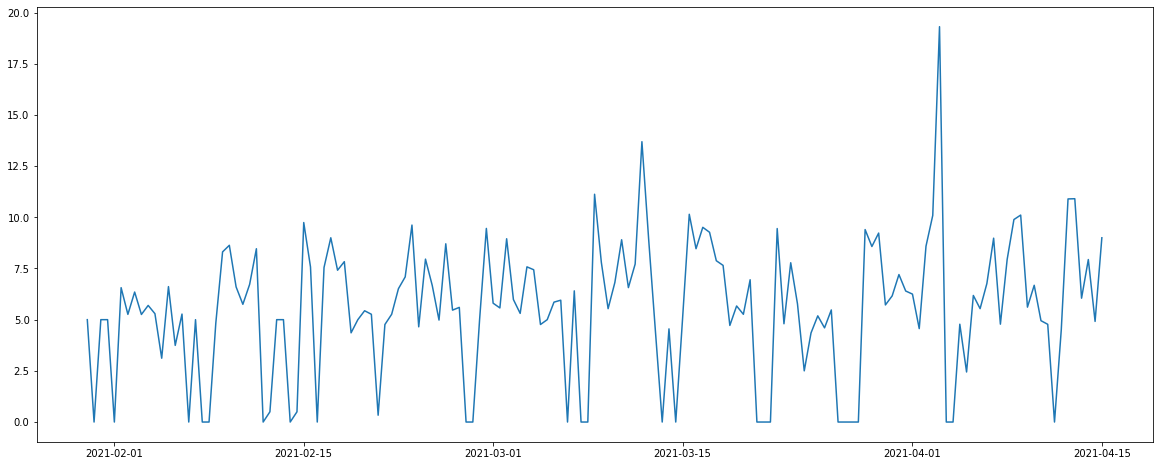

In [18]:

r = events.set_index('date')
r = r.sort_index()
r = r.resample("12H").mean().fillna(0)

plt.figure(figsize=(20,8))
plt.plot(r.index,r.running)
plt.show()

In [19]:
## Max (12h window) parallel running/queued job at a given time

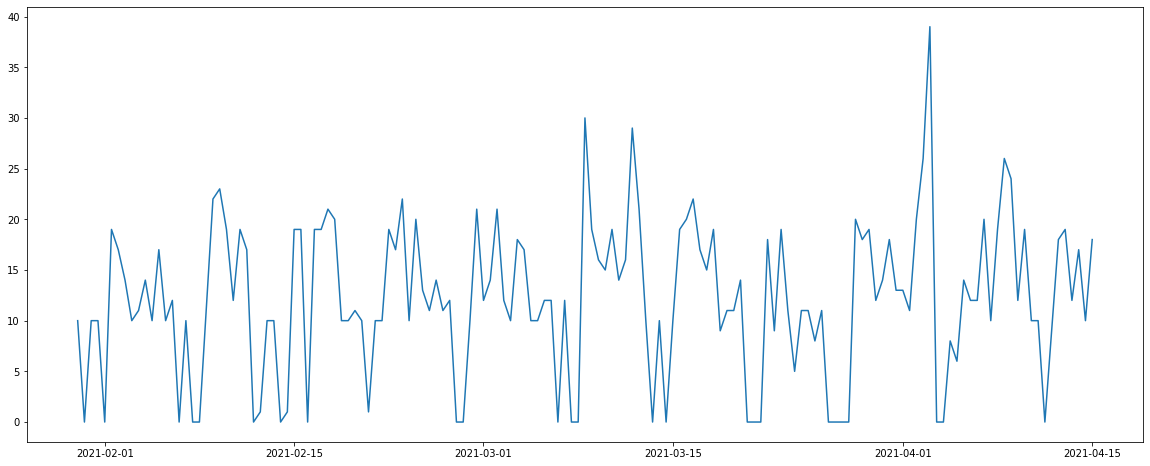

In [20]:

r = events.set_index('date')
r = r.sort_index()
r = r.resample("12H").max().fillna(0)

plt.figure(figsize=(20,8))
plt.plot(r.index,r.running)
plt.show()